In [4]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
from sklearn.model_selection import train_test_split

[-0.13533528  0.22956396 -0.59542166]
[ 4.72511256 -1.96576207 -3.52785796 -1.08765434  4.20870754  0.5559997
 -2.4874569  -1.93559798  2.48417124 -1.84243576 -3.50414258 -2.50304142
 -4.20469848  3.05316985  4.99034627  0.72763193  4.67879585 -2.44018434
  2.20292282  2.957522   -1.17825071 -2.59896212 -0.57568099 -2.036123
  0.12518837  1.99679308  3.83825029 -4.58004111  1.49698342  0.57576156
 -2.2188813  -3.8253358   2.33886669 -1.15978128  1.34075483  2.94967059
  2.8503132  -2.90307693  2.01474152  1.21461183  1.55906329  3.57264119
 -1.06869825 -4.73560621 -0.4955832   3.91155896  0.05386817 -0.01259755
 -2.69743688  2.90559812 -1.91501139 -0.50837216  3.62759678  3.45891041
  0.12307064 -1.97968271 -2.85972032  0.51997157  2.12399863 -4.51575246]
[-6.63595320e-03 -9.93700027e-01 -2.72047112e-02  6.42498947e-01
  7.26153425e-02  1.82309446e-01 -3.49503320e-02 -9.77702078e-01
 -6.74019358e-01 -8.69532450e-01 -4.19860943e-03  8.44673803e-03
 -7.04272559e-02  5.56381118e-01 -1.142

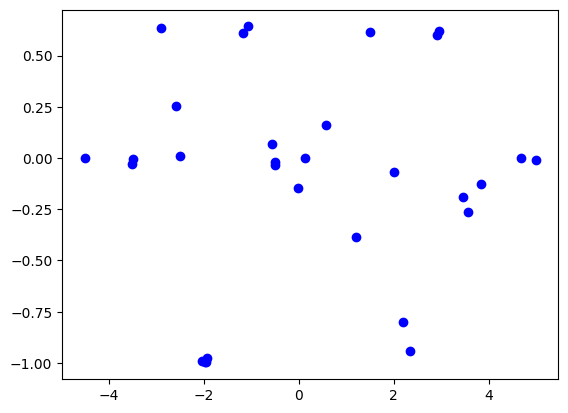

In [2]:
n_samples = 60
x_scale = 5
def sample_x(n_samples, x_scale):
    """
    input:
        parameters n_samples, x_scale
    output:
        samples of x 
    details:
        np.random.rand : sample a uniform distribution over [0, 1)
        trans uniform distribution from  [0, 1] to [-x_scale, +x_scale]
    """   
    return (np.random.rand(n_samples)-0.5)*2*x_scale

def make_true_y(x):
    """
    input:
        x
    output:
        y
    details:
        make true y by a designed function
    """
    #np.cos(np.pi*x)
    return np.exp(-0.5*(x-2)**2)*np.sin(1.5*np.pi*x) - np.exp(-0.5*(x+2)**2)*np.cos(np.pi*x)

X = sample_x(n_samples, x_scale)
y = make_true_y(X)
print(make_true_y(np.array([0, 0.5, 1])))
print (X)
print(y)
#plt.plot(X, y, 'bo')
print(type(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42) # setting 'random_state' makes sampling unchanged
print(type(X_train))
plt.plot(X_train, y_train, 'bo')
plt.savefig(f"./images/polynomial_samples.png", bbox_inches="tight")


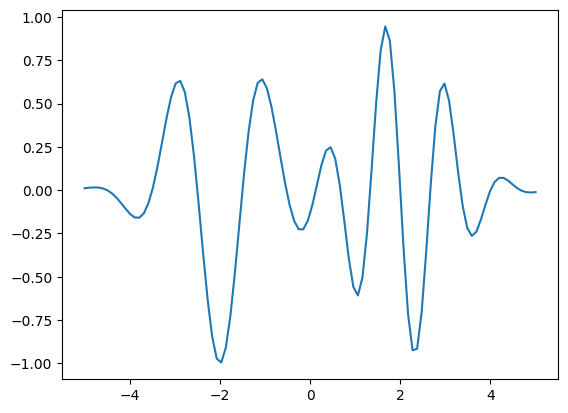

In [5]:
x_plot = np.linspace(-5, 5, 100)
plt.plot(x_plot, make_true_y(x_plot), label="True function")
plt.savefig(f"./images/polynomial_origin.png", bbox_inches="tight")

--------------------------------------------------
p:  1
x_train:  (30,)  y_train:  (30,)
x_test:  (30,)  y_test:  (30,)
norm_eq_theta:  [-0.09453197  0.01119605] (2,)
loss_train:  0.26242915607767753
loss_test:  0.2182945828416282
--------------------------------------------------
p:  2
x_train:  (30,)  y_train:  (30,)
x_test:  (30,)  y_test:  (30,)
norm_eq_theta:  [-0.11903992  0.00855147  0.00360861] (3,)
loss_train:  0.2618893230718641
loss_test:  0.2190144871721318
--------------------------------------------------
p:  3
x_train:  (30,)  y_train:  (30,)
x_test:  (30,)  y_test:  (30,)
norm_eq_theta:  [-0.12354468  0.0428662   0.00584359 -0.00269342] (4,)
loss_train:  0.25962174642140784
loss_test:  0.21432802834462086
--------------------------------------------------
p:  4
x_train:  (30,)  y_train:  (30,)
x_test:  (30,)  y_test:  (30,)
norm_eq_theta:  [-0.05515726  0.05736255 -0.02117716 -0.00418815  0.00134777] (5,)
loss_train:  0.2559871196986838
loss_test:  0.2199678358505025
-

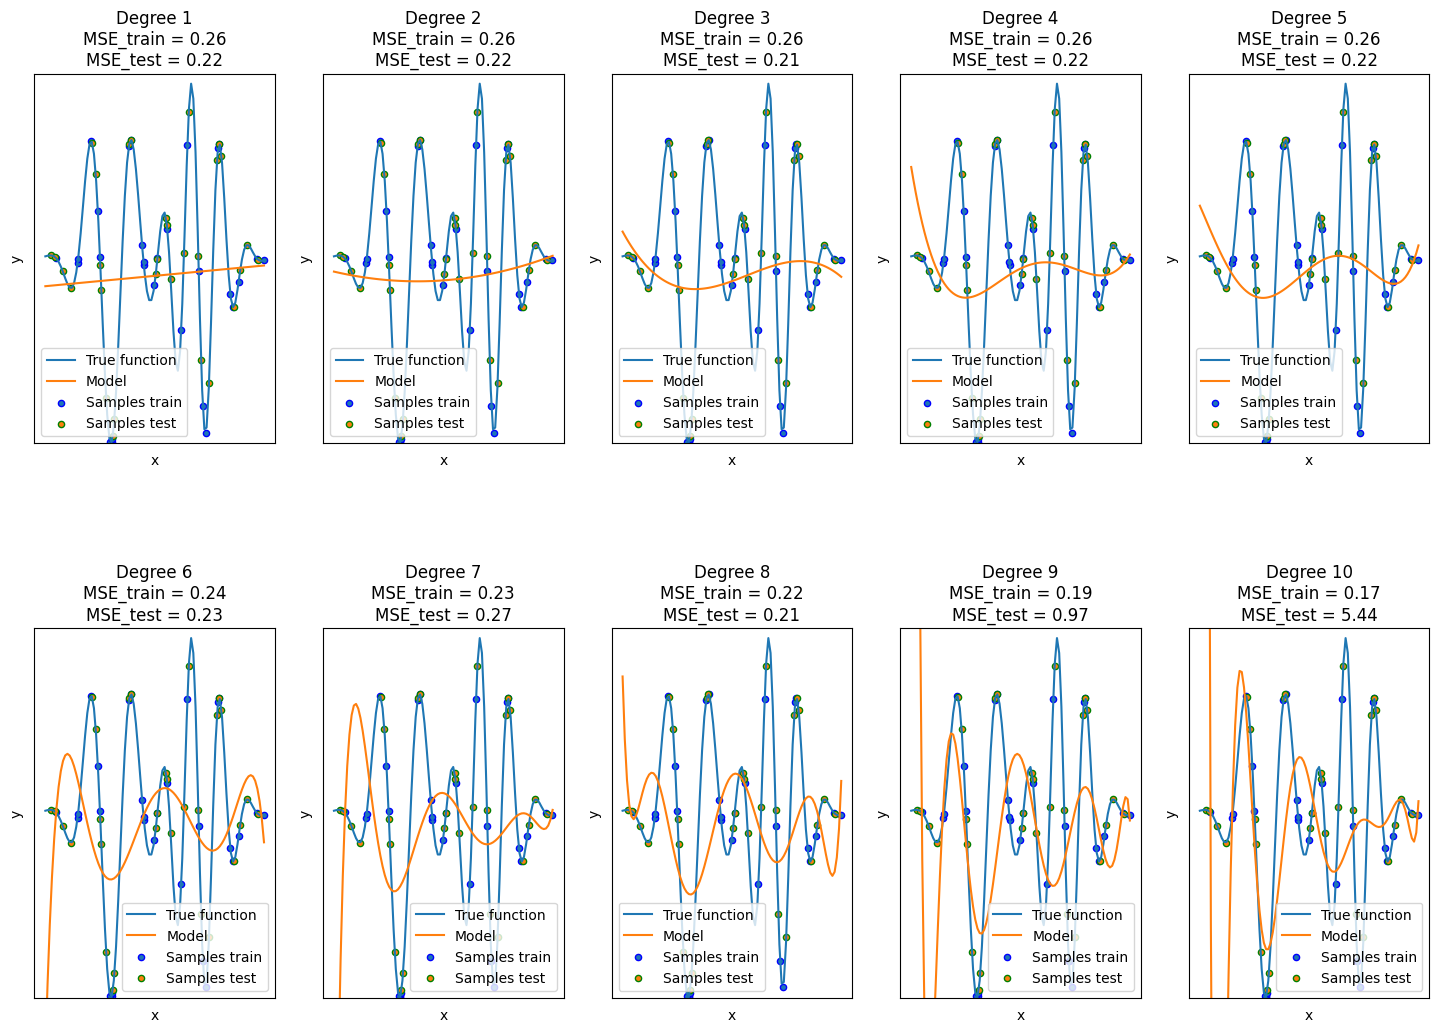

[0.2182945828416282, 0.2190144871721318, 0.21432802834462086, 0.2199678358505025, 0.2168981394842273, 0.23096081826284345, 0.26964003012733023, 0.20564057057724133, 0.9695092800060372, 5.4382280403650425]
[0.26242915607767753, 0.2618893230718641, 0.25962174642140784, 0.2559871196986838, 0.2552153309453923, 0.23561510013284437, 0.22709434699607842, 0.21840309063058122, 0.18536101808084554, 0.16855006666525418]


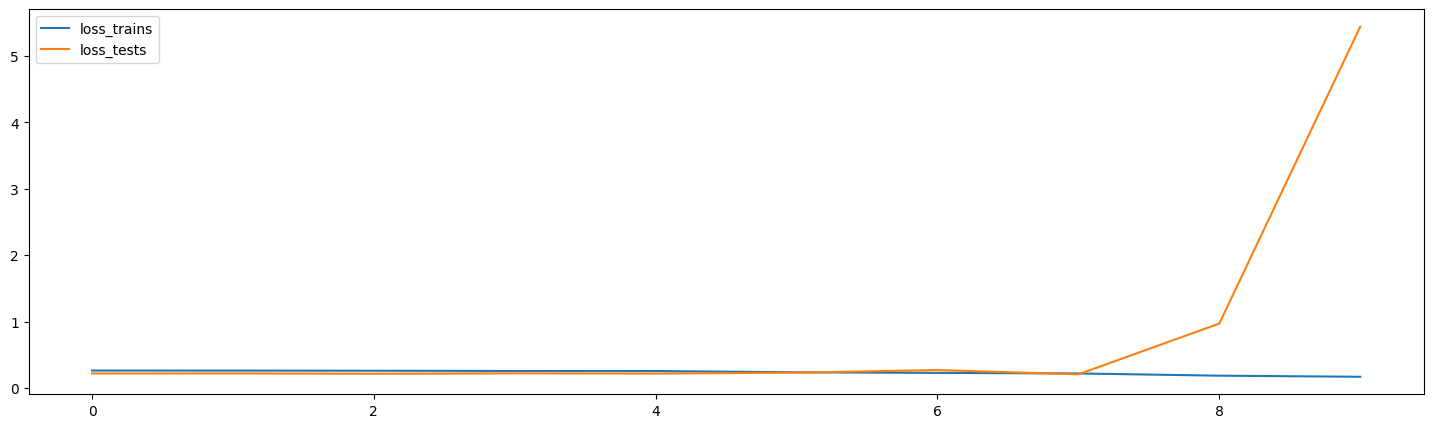

In [5]:
def polynomial_x(x, p):
    """ 
    polynomial of x
    """
    xs = []
    for i in range(p+1):
        xs.append(x**i)
    return np.array(xs).T

def linear_regression_x(x, theta):
    """
    linear regression of x
    """
    return np.dot(theta, x.T)

def linear_regression_normal_equation(x, y):
    """
    normal equation to get best linear regression
    """
    return np.dot(la.inv(np.dot(x.T, x)), np.dot(x.T, y))

def loss_func(y_true, y_pred):
    """
    MSE(mean squared erro)
    """
    return 1/len(y_true) * np.sum((y_true - y_pred) ** 2)

def run_regression(x_train, y_train, x_test, y_test, p):
    """
    run the process of regression
    """
    plt.figure(figsize=(18, int(p/5)*6))
    loss_trains , loss_tests = [], []
    for i in range(1, p+1):
        print("--------------------------------------------------")
        print("p: ", i)
        print("x_train: ", x_train.shape, " y_train: ", y_train.shape)
        print("x_test: ", x_test.shape, " y_test: ", y_test.shape)

        p_x_train = polynomial_x(x_train, i)
        p_x_test = polynomial_x(x_test, i)
        # make model
        norm_eq_theta = linear_regression_normal_equation(p_x_train, y_train)
        print("norm_eq_theta: ", norm_eq_theta, norm_eq_theta.shape)
        
        # predict
        lr_x_train = linear_regression_x(p_x_train, norm_eq_theta)
        lr_x_test = linear_regression_x(p_x_test, norm_eq_theta)
        
        loss_train = loss_func(y_train, lr_x_train)
        loss_test = loss_func(y_test, lr_x_test)
        loss_trains.append(loss_train)
        loss_tests.append(loss_test)

        
        print("loss_train: ", loss_train)
        print("loss_test: ", loss_test)

        # show time
       
        x_plot = np.linspace(-5, 5, 100)

        ax = plt.subplot(int(p/5), 5, i)
        plt.setp(ax, xticks=(), yticks=())

        plt.plot(x_plot, make_true_y(x_plot), label="True function")
        plt.plot(x_plot, linear_regression_x(polynomial_x(x_plot, i), norm_eq_theta), label="Model")
        plt.scatter(x_train, y_train, edgecolor="b", s=20, label="Samples train")
        plt.scatter(x_test, y_test, edgecolor="g", s=20, label="Samples test")
        plt.subplots_adjust(hspace=0.5)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.ylim(-1,1)
        plt.legend(loc="best")
        plt.title(
            "Degree {}\nMSE_train = {:.2f}\nMSE_test = {:.2f}".format(
                i, loss_train, loss_test
            )
        )
        plt.savefig("./images/polynomial_{}_order.png".format(i), bbox_inches="tight")
    plt.show()
    
    print(loss_tests)
    print(loss_trains)
    plt.figure(figsize=(18, 5))
    plt.plot(loss_trains, label = "loss_trains")
    plt.plot(loss_tests, label = "loss_tests")
    plt.legend(loc="best")
    plt.savefig(f"./images/polynomial_loss.png", bbox_inches="tight")

run_regression(X_train, y_train, X_test, y_test, 10)